In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [15]:
file_path = 'sales.csv'  # Pastikan file berada dalam direktori yang sama
data = pd.read_csv(file_path)

# Tampilkan beberapa baris pertama untuk verifikasi
print("Beberapa baris data:")
print(data.head())

Beberapa baris data:
  Product_Code  W0  W1  W2  W3  W4  W5  W6  W7  W8  ...  Normalized 42  \
0           P1  11  12  10   8  13  12  14  21   6  ...           0.06   
1           P2   7   6   3   2   7   1   6   3   3  ...           0.20   
2           P3   7  11   8   9  10   8   7  13  12  ...           0.27   
3           P4  12   8  13   5   9   6   9  13  13  ...           0.41   
4           P5   8   5  13  11   6   7   9  14   9  ...           0.27   

   Normalized 43  Normalized 44  Normalized 45  Normalized 46  Normalized 47  \
0           0.22           0.28           0.39           0.50           0.00   
1           0.40           0.50           0.10           0.10           0.40   
2           1.00           0.18           0.18           0.36           0.45   
3           0.47           0.06           0.12           0.24           0.35   
4           0.53           0.27           0.60           0.20           0.20   

   Normalized 48  Normalized 49  Normalized 50  Norma

In [17]:
features = data.loc[:, "W0":"W9"]

# Periksa nilai kosong
if features.isnull().sum().any():
    print("Data mengandung nilai kosong. Akan dihapus...")
    features = features.dropna()

# Statistik deskriptif
print("Statistik deskriptif fitur:")
print(features.describe())

Statistik deskriptif fitur:
               W0          W1          W2          W3          W4          W5  \
count  811.000000  811.000000  811.000000  811.000000  811.000000  811.000000   
mean     8.902589    9.129470    9.389642    9.717633    9.574599    9.466091   
std     12.067163   12.564766   13.045073   13.553294   13.095765   12.823195   
min      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
25%      0.000000    0.000000    0.000000    0.000000    0.000000    0.000000   
50%      3.000000    3.000000    3.000000    4.000000    4.000000    3.000000   
75%     12.000000   12.000000   12.000000   13.000000   13.000000   12.500000   
max     54.000000   53.000000   56.000000   59.000000   61.000000   52.000000   

               W6          W7          W8          W9  
count  811.000000  811.000000  811.000000  811.000000  
mean     9.720099    9.585697    9.784217    9.681874  
std     13.347375   13.049138   13.550237   13.137916  
min      0.000000 

In [19]:
scaler = StandardScaler()
normalized_features = scaler.fit_transform(features)

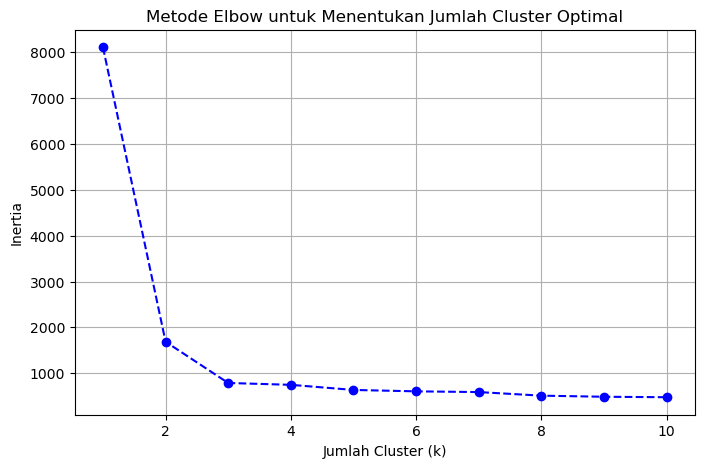

In [21]:
inertia = []
k_values = range(1, 11)  # Cluster dari 1 hingga 10

for k in k_values:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(normalized_features)
    inertia.append(kmeans.inertia_)

# Visualisasi Elbow
plt.figure(figsize=(8, 5))
plt.plot(k_values, inertia, marker='o', linestyle='--', color='b')
plt.title('Metode Elbow untuk Menentukan Jumlah Cluster Optimal')
plt.xlabel('Jumlah Cluster (k)')
plt.ylabel('Inertia')
plt.grid(True)
plt.show()


In [23]:
optimal_k = 3
kmeans = KMeans(n_clusters=optimal_k, random_state=42)
clusters = kmeans.fit_predict(normalized_features)

# Tambahkan hasil cluster ke dataset asli
data['Cluster'] = clusters

# Tampilkan hasil clustering
print("Hasil clustering (5 data pertama):")
print(data[['Cluster']].head())

Hasil clustering (5 data pertama):
   Cluster
0        1
1        0
2        1
3        1
4        1


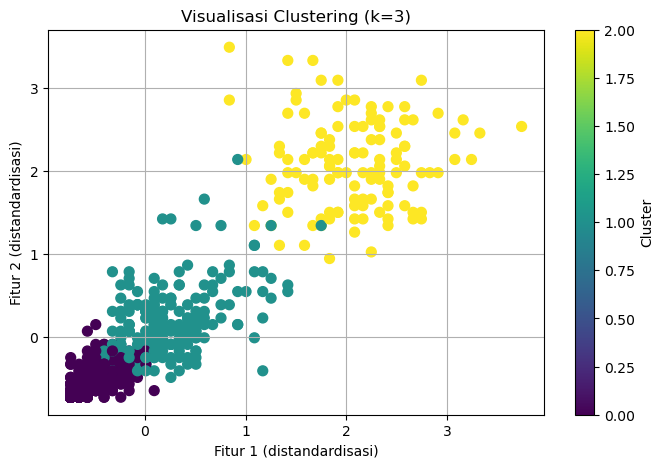

In [25]:
plt.figure(figsize=(8, 5))
plt.scatter(normalized_features[:, 0], normalized_features[:, 1], c=clusters, cmap='viridis', s=50)
plt.title(f'Visualisasi Clustering (k={optimal_k})')
plt.xlabel('Fitur 1 (distandardisasi)')
plt.ylabel('Fitur 2 (distandardisasi)')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()

In [27]:
output_path = 'sales_with_clusters.csv'
data.to_csv(output_path, index=False)
print(f"Hasil clustering disimpan ke file: {output_path}")

Hasil clustering disimpan ke file: sales_with_clusters.csv
